In [61]:
import pandas as pd
import math
import numpy as py

# baca data tunnel.csv
data = pd.read_csv("tunnel.csv")

# buat kolom baru bernama time, isi dengan nilai 0, konversi ke list
data['time'] = 0
time = data['time']
time = time.tolist()

# isi kolom time dengan nilai mulai dari 0, 1, 2, 3, 4, 5, .... hingga len(data)
for i in range(0, len(data)):
  time[i] = i

print(time)

# ambil target y, yaitu data (NumVehicles)
y = data['NumVehicles']
y = y.tolist()

print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

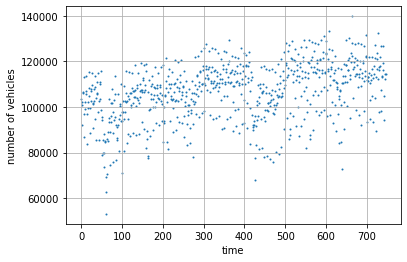

In [62]:
import matplotlib.pyplot as plt
plt.scatter(time, y, s = 1)
plt.grid()
plt.xlabel('time')
plt.ylabel('number of vehicles')
plt.show()

# amati grafik, sesuaikan data outlier

In [64]:
print(min(y))
print(max(y))
print(sum(y)/len(y))

53098
139840
106567.75502008032


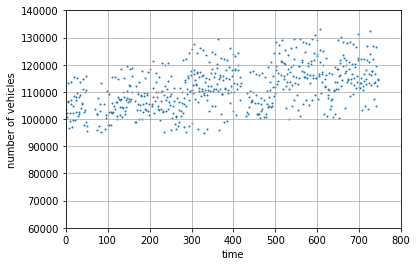

In [65]:
total = 0

# pada semua data, jika nilai y kurang dari 80000 atau lebih dari 135000, maka ubah data dengan nilai rata-rata 10 data di sekitarnya
for i in range(0, len(y)):
  if y[i] < 80000 or y[i] > 135000:
    for j in range(i-5, i+5):
      if j >= len(y)-6:
        break
      total += y[j]
    avg = total/10
    y[i] = avg

# ulangi langkah untuk data ke-0 hingga 200, jika data y kurang dari 95000, beri nilai data tsb dengan rata-rata 10 data di sekitarnya
for i in range(0, 200):
  if y[i] < 95000:
    for j in range(i-5, i+5):
      if j >= len(y)-6:
        break
      total += y[j]
    avg = total/10
    y[i] = avg

# ulangi lagi untuk data ke 200 - 400
for i in range(200, 400):
  if y[i] < 95000:
    for j in range(i-5, i+5):
      if j >= len(y)-6:
        break
      total += y[j]
    avg = total/10
    y[i] = avg

# ulangi lagi untuk siswa data, jika nilai y kurang dari 100000, maka isi dengan rata-rata 10 data di sekitarnya
for i in range(400, len(y)):
  if y[i] < 100000:
    for j in range(i-5, i+5):
      if j >= len(y)-6:
        break
      total += y[j]
    avg = total/10
    y[i] = avg

plt.scatter(time, y, s = 1)
plt.xlim(0, 800)
plt.ylim(60000, 140000)
plt.grid()
plt.xlabel('time')
plt.ylabel('number of vehicles')
plt.show()

In [90]:
def gradient_descent(X, Y, w, b, alpha):
 
    dl_dw = 0.0                     # variabel sementara untuk menghitung -1 * X * (Y - (w * X + b)) atau bagian dari rumus gradient descent dari seluruh data
    dl_db = 0.0                     # variabel sementara untuk menghitung -1 * (Y - (w * X + b)) atau bagian dari rumus gradian descent dari seluruh data
    N = len(X)                      # hitung banyak data X, simpan di N

    # rumus gradient descent:
    # w = w - (1/N) * dl_dw * alpha
    # b = b - (1/N) * dl_db * alpha 

    for i in range(N):              # iterasi sebanyak jumlah data (N)
        dl_dw += -1*X[i] * (Y[i] - (w*X[i] + b))  # dl_dw digunakan utk menyimpan hitungan -1 * X * (Y - (w * X + b)) dari setiap data, dan dijumlah total hasilnya
        dl_db += -1*(Y[i] - (w*X[i] + b))         # dl_db digunakan utk menyimpan hitungan -1 * (Y - (w * X + b)) dari setiap data, dan dijumlah total hasilnya

    w = w - (1/float(N)) * dl_dw * alpha          # menghitung nilai w
    b = b - (1/float(N)) * dl_db * alpha          # menghitung nilai b

    return w, b

# fungsi untuk cost function (kesalahan prediksi)
def cost_function (X, Y, w, b):
  # X = dataset kolom x (sumbu x)
  # Y = dataset kolom y (sumbu y)
  # N = banyak data kolom X
  # w dan b adalah parameter yg diperoleh dari fungsi gradient descent
  # rumus: total_error = 1/2 * N * (Y - (w * X - b)) ** 2


    N = len(X)                                   # hitung banyak data X
    total_error = 0.0 
                        # variabel total error untuk menyimpan hasil perhitungan cost function, diberi nilai awal 0
    for i in range(N):                                    # hitung error untuk setiap data, berulang sebanyak banyak data
        total_error += (Y[i] - (w*X[i] - b))**2   # hitung dulu (Y - (w * X - b ))**2
        
    return total_error / (2*float(N))             # baru hasilnya dikali 1/2, dan dikirim ke fungsi train
    

# rumus regresi adalah => prediksi = w * x + b
# w dan b dicari menggunakan fungsi gradient descent
# X dan Y adalah data pada sumbu x dan sumbu y
# alpha adalah laju pengaturan perubahan nilai w dan b untuk mencari nilai w dan b yang paling bagus, biasanya alpha adalah antara 0.001 hinga 0.1 
# n_iter adalah jumlah iterasi (berapa kali nilai w dan b akan dihitung utk mendapat nilai optimal)
# gunakan data training untuk fungsi train ini
def train(X, Y, w, b, alpha, n_iter):
    cost = list()
    iter = list()
    for i in range(n_iter):                        # training dilakukan berulang hingga sejumlah n_iter
        w, b = gradient_descent(X, Y, w, b, alpha) # hitung w dan b menggunakan fungsi gradient descent sebanyak n_iter kali

        if i % 400 == 0:                         # cetak hasilnya setiap kelipatan iterasi 400 (cetak pada iterasi ke 0, ke 400, ke 800, dst hingga 7000)
          print ("iteration:", i, "cost: ", cost_function(X, Y, w, b)) # cetak iterasi ke berapa (nilai i menunjukkan hitungan iterasi), cetak cost function utk menampilkan total error
          cost.append(cost_function(X, Y, w, b))
          iter.append(i)
        
    plt.plot(iter, cost)
    plt.show()
    return w, b                                    # return hasil perhitungan w dan b


#fungsi untuk melakukan prediksi
def predict(x, w, b):                             # prediksi data testing dengan rumus regresi x * w + b, di mana x adalah data testing pada sumbu x
    return x*w + b

95014
iteration: 0 cost:  2.1543941914926436e+20
iteration: 400 cost:  1.903236046931043e+20
iteration: 800 cost:  1.9032364484446867e+20
iteration: 1200 cost:  1.9032369273269777e+20
iteration: 1600 cost:  1.9032374062648856e+20
iteration: 2000 cost:  1.9032378852601997e+20
iteration: 2400 cost:  1.903238364312922e+20
iteration: 2800 cost:  1.9032388434230503e+20
iteration: 3200 cost:  1.903239322590584e+20
iteration: 3600 cost:  1.9032398018155184e+20
iteration: 4000 cost:  1.9032402810978556e+20
iteration: 4400 cost:  1.9032407604375912e+20
iteration: 4800 cost:  1.9032412398347216e+20
iteration: 5200 cost:  1.9032417192892485e+20
iteration: 5600 cost:  1.90324219880117e+20
iteration: 6000 cost:  1.90324267837048e+20
iteration: 6400 cost:  1.903243157997183e+20
iteration: 6800 cost:  1.9032436376812716e+20
iteration: 7200 cost:  1.903244117422747e+20
iteration: 7600 cost:  1.9032445972216044e+20
iteration: 8000 cost:  1.903245077077847e+20
iteration: 8400 cost:  1.9032455569914698e+

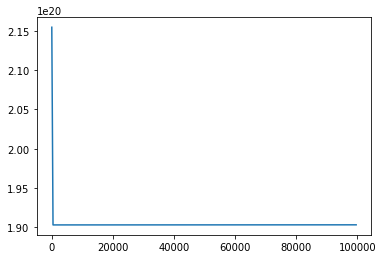

16782981.520641807
-10893267.913276551


Uji prediksi dengan satu data

nilai y jika x = 50 adalah  1667404884.1509044


In [91]:
#Implementasi regresi single variabel

y_min = min(y)
print(y_min)

#hitung nilai w dan b
w, b = train(time, y, 0, 0, 0.0000001, 100000)
print(w)
print(b)

#uji coba prediksi dengan memprediksi nilai y jika x adalah 50
x_new = 100
y_new = predict(x_new, w, b)
print("\n\nUji prediksi dengan satu data\n\nnilai y jika x = 50 adalah ", y_new)                             # tampilkan prediksi y jika x adalah 50
